In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
plt.style.use('ggplot')

In [153]:
%config InlineBackend.figure_format = 'retina'

### Example 1

In [56]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', np.nan),
                   ('mammal', 'Carnivora', 58)],
                  index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed'))

In [70]:
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [80]:
grouped = df.groupby('class', axis=0)

In [81]:
grouped.describe()

max_speed                                                       
           count   mean         std   min     25%    50%     75%    max
class                                                                  
bird         2.0  206.5  258.093975  24.0  115.25  206.5  297.75  389.0
mammal       2.0   69.1   15.697771  58.0   63.55   69.1   74.65   80.2

In [62]:
grouped = df.groupby('order', axis='rows')

In [63]:
grouped.describe()

max_speed                                                  \
                   count   mean        std    min     25%    50%     75%   
order                                                                      
Carnivora            2.0   69.1  15.697771   58.0   63.55   69.1   74.65   
Falconiformes        1.0  389.0        NaN  389.0  389.00  389.0  389.00   
Primates             0.0    NaN        NaN    NaN     NaN    NaN     NaN   
Psittaciformes       1.0   24.0        NaN   24.0   24.00   24.0   24.00   

                       
                  max  
order                  
Carnivora        80.2  
Falconiformes   389.0  
Primates          NaN  
Psittaciformes   24.0

In [64]:
grouped = df.groupby(['class', 'order'])

In [65]:
grouped.describe()

max_speed                                          \
                          count   mean        std    min     25%    50%   
class  order                                                              
bird   Falconiformes        1.0  389.0        NaN  389.0  389.00  389.0   
       Psittaciformes       1.0   24.0        NaN   24.0   24.00   24.0   
mammal Carnivora            2.0   69.1  15.697771   58.0   63.55   69.1   
       Primates             0.0    NaN        NaN    NaN     NaN    NaN   

                                      
                          75%    max  
class  order                          
bird   Falconiformes   389.00  389.0  
       Psittaciformes   24.00   24.0  
mammal Carnivora        74.65   80.2  
       Primates           NaN    NaN

In [82]:
for i in grouped.groups:
    print(i)

bird
mammal


### Example 2

In [84]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,-0.608660,-0.925947
1,bar,one,0.921940,1.693734
2,foo,two,-0.437434,0.581776
3,bar,three,-0.320848,0.929641
4,foo,two,-1.302693,-1.761135
5,bar,two,-0.338937,1.221306
6,foo,one,1.986551,-2.072767
7,foo,three,0.015366,0.368157


In [88]:
df.groupby(['A', 'B']).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.921940       NaN  0.921940  0.921940  0.921940  0.921940   
    three   1.0 -0.320848       NaN -0.320848 -0.320848 -0.320848 -0.320848   
    two     1.0 -0.338937       NaN -0.338937 -0.338937 -0.338937 -0.338937   
foo one     2.0  0.688946  1.835091 -0.608660  0.040143  0.688946  1.337748   
    three   1.0  0.015366       NaN  0.015366  0.015366  0.015366  0.015366   
    two     2.0 -0.870064  0.611831 -1.302693 -1.086378 -0.870064 -0.653749   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.921940   1.0  1.693734       NaN  1.693734  1.693734  1.693734   
    three -0.320848   1.0  0.929641       NaN  0.929641  0.929641  0.929641   
    two   -0.338937   1.0  1.221306       NaN  1.221306  1.221306  1.221306   
foo one    1.986551   2.0 -1.499357  0.810924 -2.072767 -1.786062 -1.499357   
    three  0.015366   1.0  0.368157       NaN  0.368157  0.368157  0.368157   
    two   -0.437434   2.0 -0.589680  1.656688 -1.761135 -1.175408 -0.589680   

                               
                75%       max  
A   B                          
bar one    1.693734  1.693734  
    three  0.929641  0.929641  
    two    1.221306  1.221306  
foo one   -1.212652 -0.925947  
    three  0.368157  0.368157  
    two   -0.003952  0.581776

In [89]:
df2 = df.set_index(['A', 'B'])

In [90]:
df2

C         D
A   B                        
foo one   -0.608660 -0.925947
bar one    0.921940  1.693734
foo two   -0.437434  0.581776
bar three -0.320848  0.929641
foo two   -1.302693 -1.761135
bar two   -0.338937  1.221306
foo one    1.986551 -2.072767
    three  0.015366  0.368157

In [96]:
df2.columns

Index(['C', 'D'], dtype='object')

In [102]:
# Group by all but the specified columns
grouped = df2.groupby(level=df2.index.names.difference(['A']))

In [107]:
grouped.sum()

,C,D
B,,
one,2.299832,-1.304980
three,-0.305483,1.297799
two,-2.079064,0.041947


In [112]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant' 

grouped = df.groupby(get_letter_type, axis=1)

In [113]:
grouped.groups

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [114]:
grouped.describe()

count        mean      std      min       25%       50%       75%  \
consonant C     8  -0.0105894  1.01927 -1.30269 -0.480241 -0.329893  0.242009   
          D     8  0.00434568  1.41188 -2.07277  -1.13474  0.474966   1.00256   
vowel     A     8         NaN      NaN      NaN       NaN       NaN       NaN   

                 max unique  top freq  
consonant C  1.98655    NaN  NaN  NaN  
          D  1.69373    NaN  NaN  NaN  
vowel     A      NaN      2  foo    5

In [115]:
len(grouped)

2

In [120]:
df.groupby('A', as_index=False).sum()

,A,C,D
0,bar,0.262155,3.844682
1,foo,-0.346870,-3.809916


### Example 3

In [121]:
index = pd.date_range('10/1/1999', periods=1100)

In [127]:
tf = pd.DataFrame(np.random.normal(0.5, 2, (1100, 5)), index)

In [128]:
tf.shape

(1100, 5)

In [132]:
tf.head()

,0,1,2,3,4
2000-01-08,0.233361,0.054177,0.507170,0.704389,0.602652
2000-01-09,0.164490,0.090114,0.526151,0.685782,0.576968
2000-01-10,0.181554,0.119178,0.519139,0.673225,0.522763
2000-01-11,0.156437,0.124047,0.532438,0.633083,0.543157
2000-01-12,0.168778,0.135764,0.545363,0.596920,0.599808


In [129]:
tf = tf.rolling(window=100, min_periods=100).mean().dropna()

In [130]:
tf.shape

(1001, 5)

In [131]:
tf.head()

,0,1,2,3,4
2000-01-08,0.233361,0.054177,0.507170,0.704389,0.602652
2000-01-09,0.164490,0.090114,0.526151,0.685782,0.576968
2000-01-10,0.181554,0.119178,0.519139,0.673225,0.522763
2000-01-11,0.156437,0.124047,0.532438,0.633083,0.543157
2000-01-12,0.168778,0.135764,0.545363,0.596920,0.599808


In [140]:
transformed = (tf.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std()))

In [147]:
tf.columns

RangeIndex(start=0, stop=5, step=1)

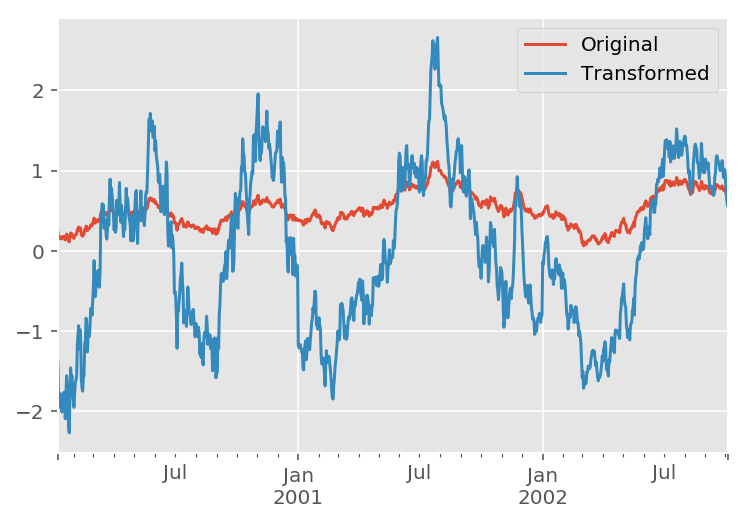

In [154]:
compare = pd.DataFrame({'Original': tf.iloc[:, 0], 'Transformed': transformed.iloc[:, 0]})
compare.plot()

### Example 4

### Example 5